# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1. Importing the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('classic')
sns.set()

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# setting up pandas to view large files
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

## 2. Reading the Data

In [2]:
# importing csv file 'day.csv' as bike.
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# checking the dimensions of the Dataframes 'bike'
print('Dimension:' , bike.shape)

Dimension: (730, 16)


In [4]:
# bike information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


***Here we can see that thee are no null values in the dataset.***

In [5]:
# Check the summary for the numeric columns.
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Renaming the columns for beter understanding
bike.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike.head(10)

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [8]:
# dropping columns that I think are irrelevant for the model
bike.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
# Mapping variables season, month, weathersit, weekday for the ease of visualisation of the data-set
bike['season']=bike.season.map({1: 'spring', 2: 'summer', 3:'fall', 4:'winter' })

bike['month']=bike.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',
                              7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bike['weathersit']=bike.weathersit.map({1: 'Clear', 2:'Mist + Cloudy', 3:'Light Snow', 4:'Snow + Fog'})

bike['weekday']=bike.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## 3. Data Visualization
### 3.1 Categorical Variables

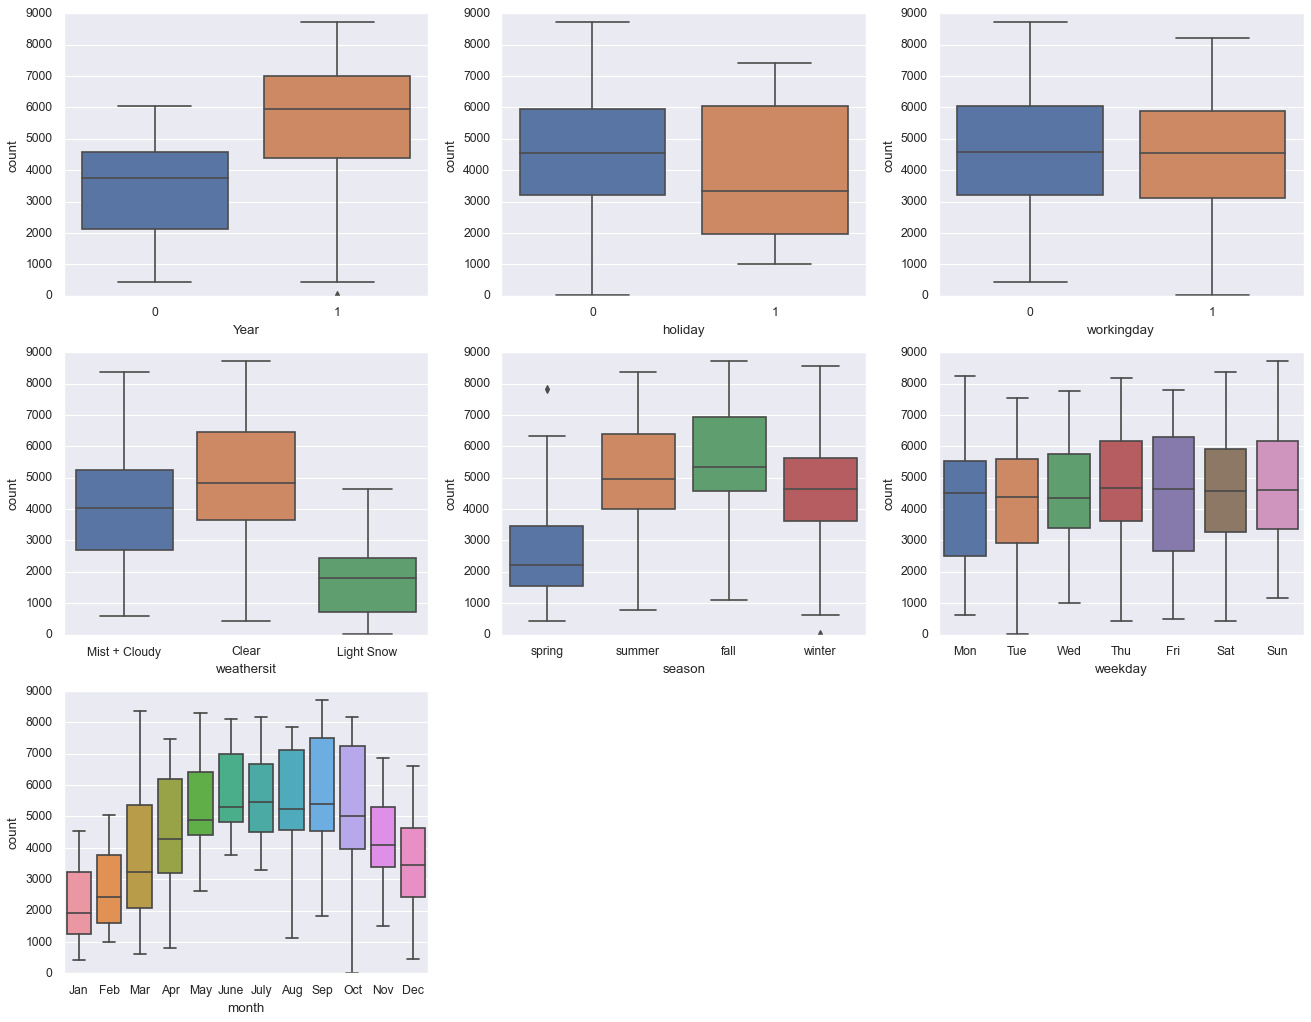

In [10]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(20, 15))

plt.subplot(3,3,1)
sns.boxplot(x = 'Year', y = 'count', data = bike)

plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'season', y = 'count', data = bike)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', data = bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'month', y = 'count', data = bike)

plt.show()

### *Observation from the above Plots:*
***Year vs Count:***
* We observe a significant increase in Bike rental count for the year of 2019 when copared with the year 2018.
* Highest Bike rental count for the year of 2018 is between 6000 and 7000 while the Bike rental count for the year 2019 is between 8000 and 9000.

***Holiday vs Count:***
* We observe that the Bike rental count is significantly more when there's a holiday as compared to the not holiday.

***Wokingday vs Count:***
* The Bike rental count is comparitively high on non-workingdays when compared to that of the workingday.

***Weathersit vs Count:***
* We see that the Bike rental count is high when the day is cleaar when compared to others.
* On days with light snow the Bike rental count is very less.

***Season vs Count:***
* The majority of the Bike rental count is in the Fall season, followed by winter season and summer.

***Weekday vs Count:***
* We observe more Bike rental count on Saturdays and Sundays.
* While on the rest of the days its almost similar

***Month vs Count:***
* We observe a high peak in the Bike rental count for the month of September followed by March and May.

### 3.2 Numerical Variables

In [11]:
bike.describe()

,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


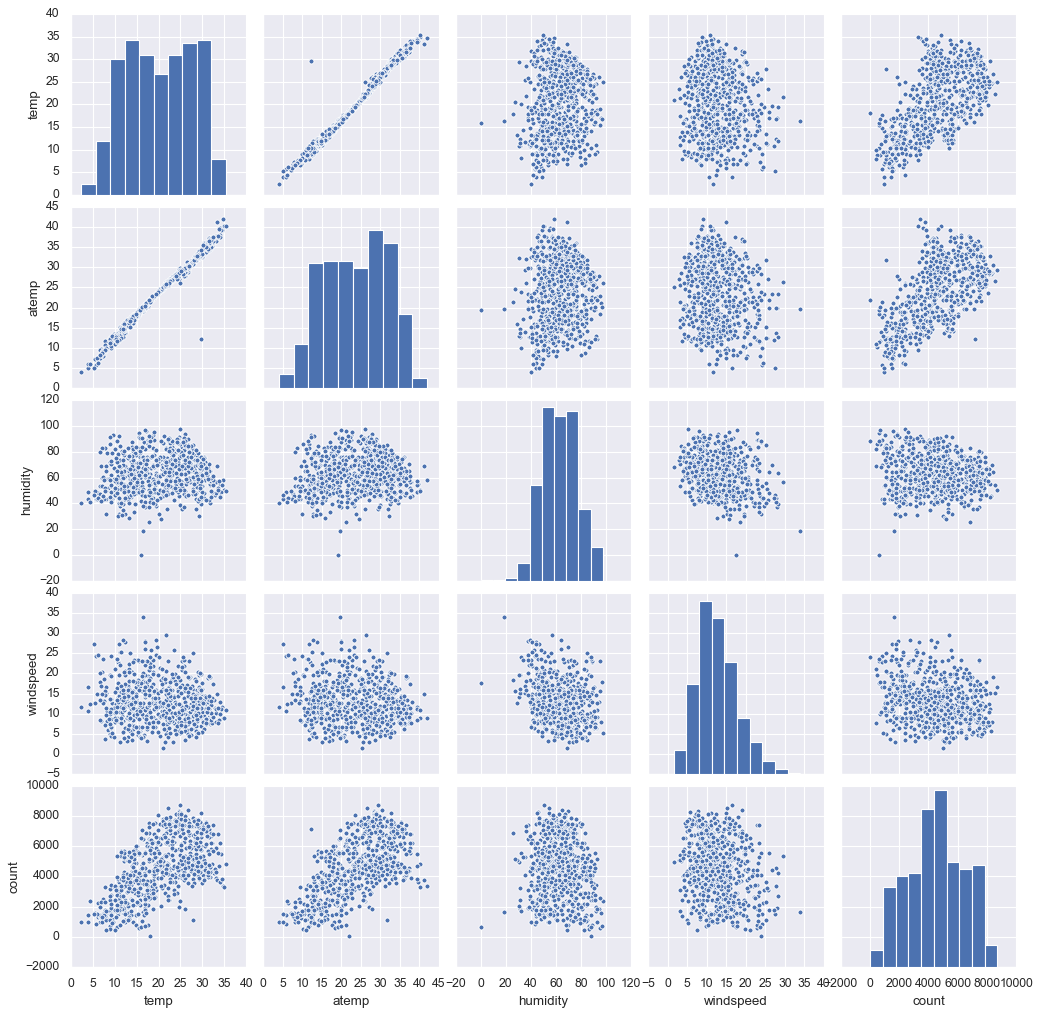

In [12]:
# Pairplot for numeric variables
sns.pairplot(bike, vars=['temp', 'atemp', 'humidity', 'windspeed','count'])
plt.show()

**Observation from the above Plots:**
* We can observe as the temperature rises the Bike rental count also rises.
* We can observe Bike rantal counts are more in high humidity.

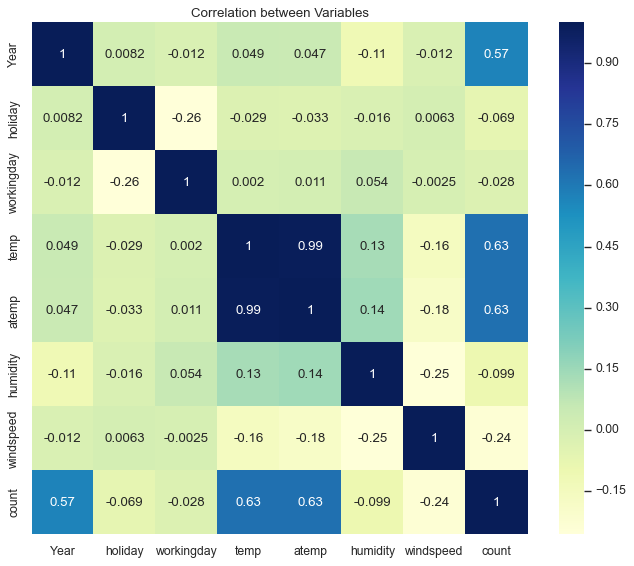

In [13]:
# Heatmap to observe correlation between the variables
plt.figure(figsize=(10, 8))
sns.heatmap(bike.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

**Observation from the above Plots:**
* We can observe a high correlation of Count with Temperature(+ve), Humidity(-ve) and Year(+ve).

## 4. Data Preparation
### 4.1 Creating Dummy Variables

In [14]:
bike.columns

Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [15]:
# Creating dummy variables for season , month ,weathersit ,weekday
dummy = bike[['season', 'month', 'weekday', 'weathersit']]
dummy = pd.get_dummies(dummy, drop_first=True )

# Adding dummy variables to original dataset
bike_d = pd.concat([dummy, bike],axis = 1)
bike_d.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Dropping columns for which dummy variables were created
bike_d.drop(['season', 'month', 'weekday','weathersit'], axis = 1, inplace = True)
bike_d.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


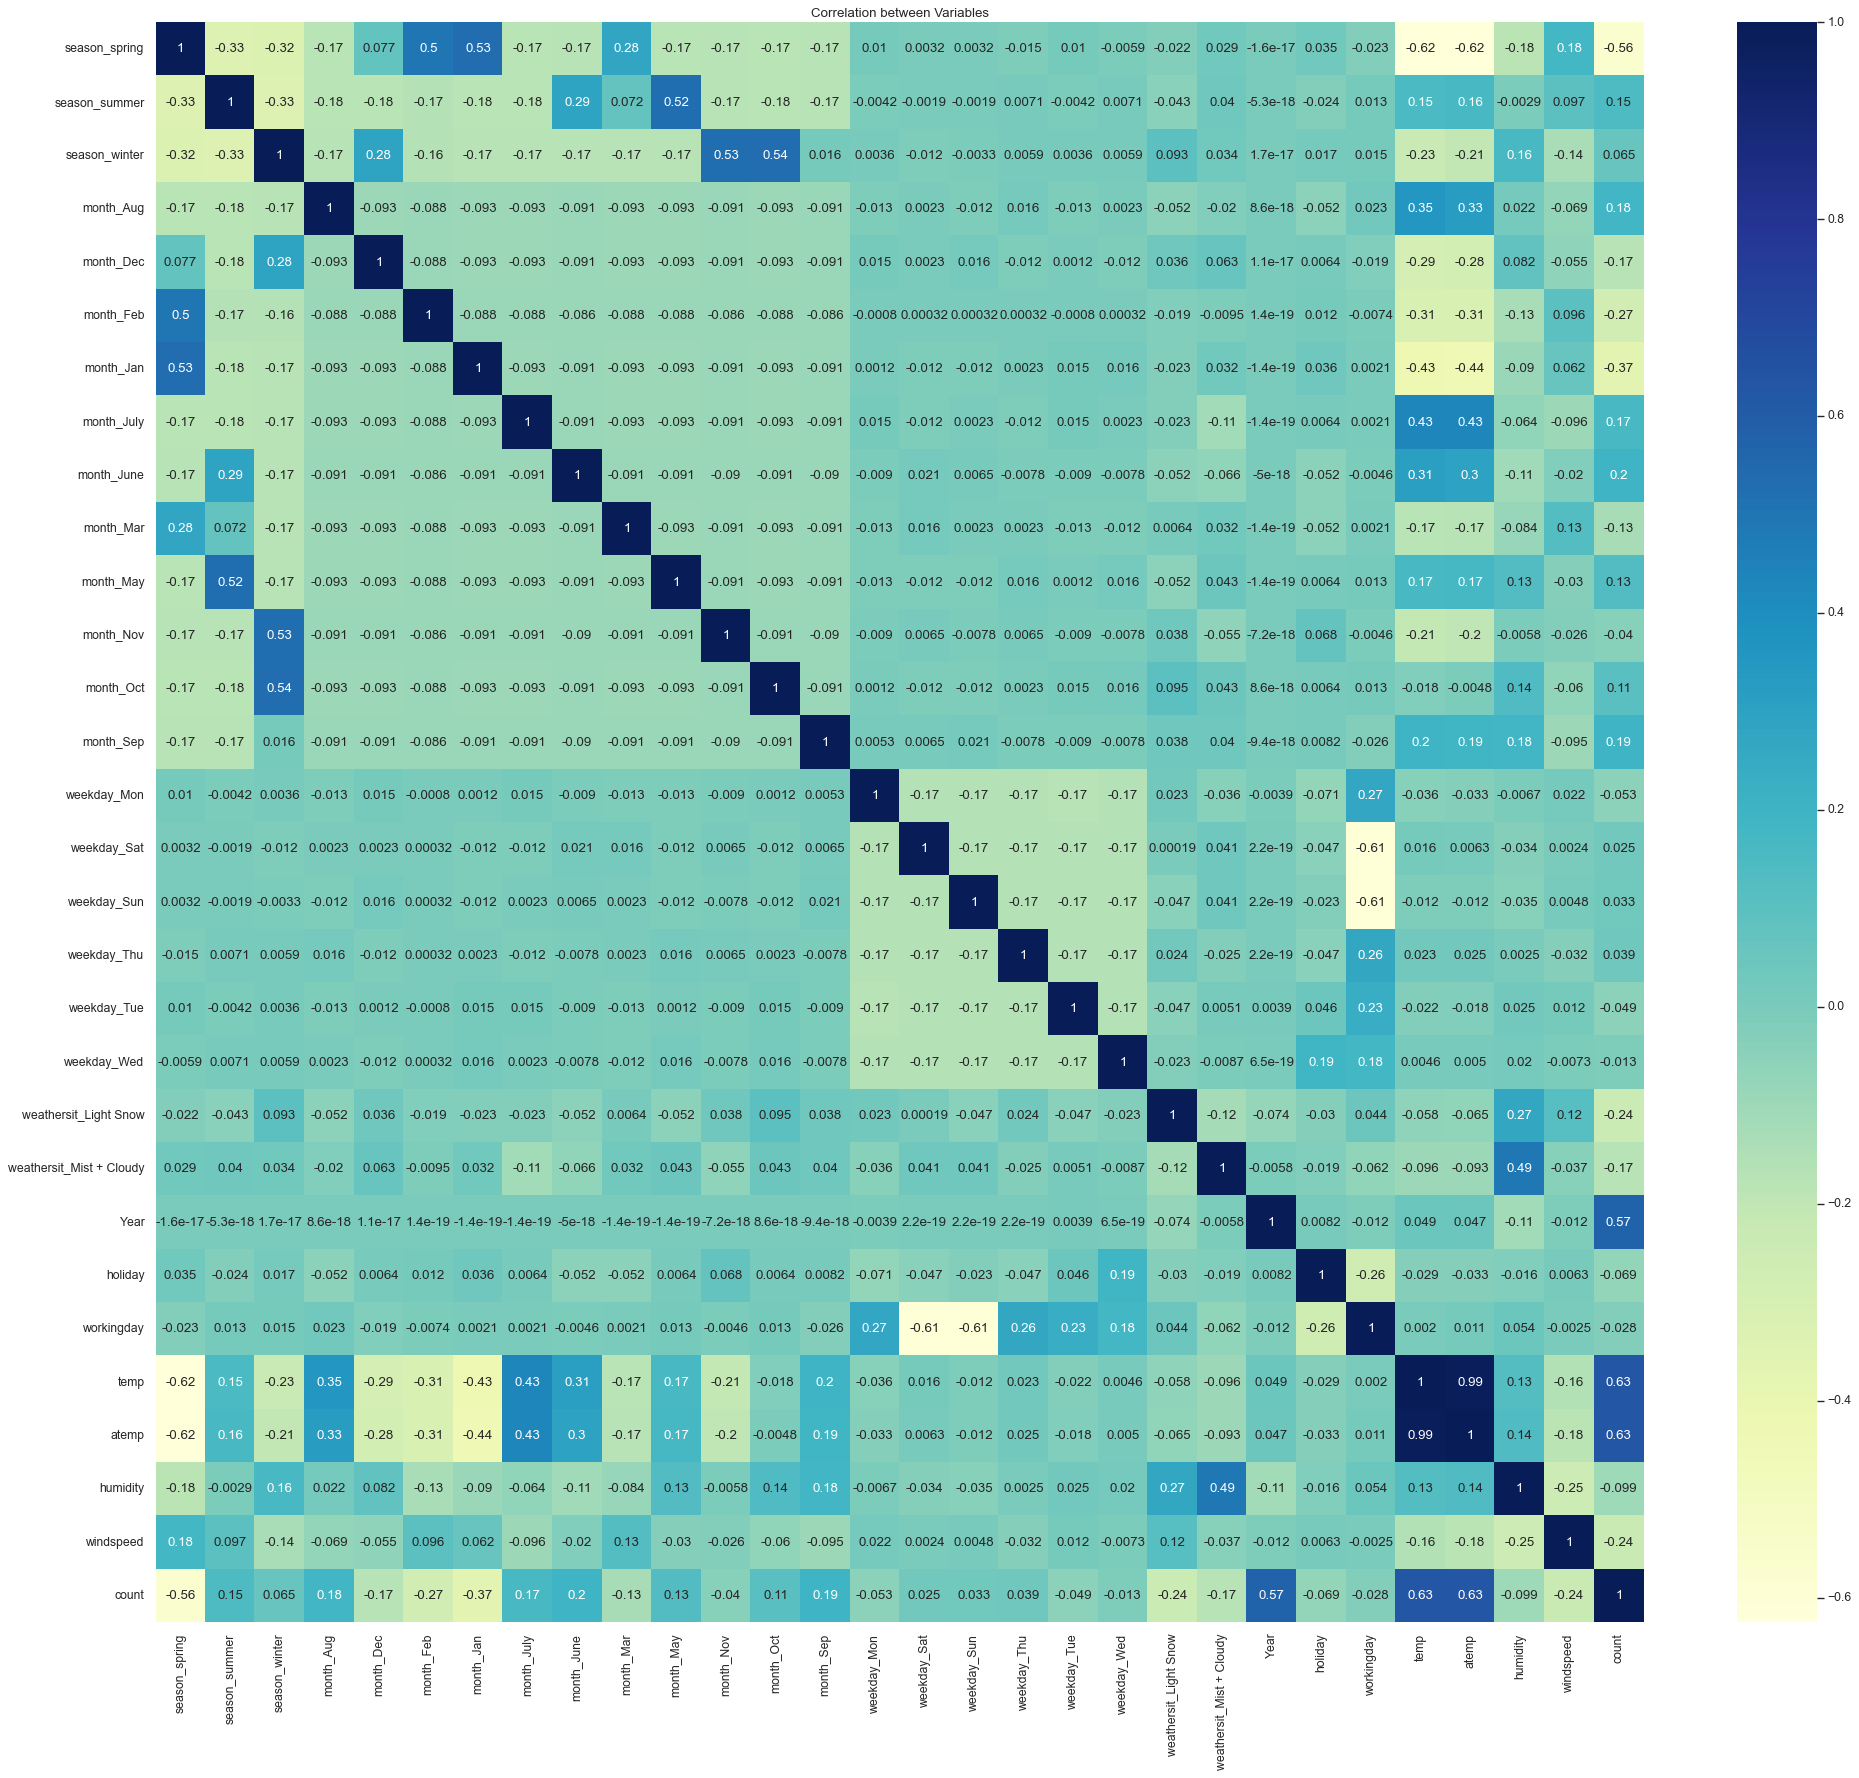

In [17]:
# Heatmap to observe correlation between the variables
plt.figure(figsize=(30, 25))
sns.heatmap(bike_d.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

**Observation from the above Plots:**
* We can observe a high correlation of Count with Temperature(+ve).
* Summer season,June to october months are in good correlation with the Count variable and seem to have good influence on the number of bike rentals.

### 4.2 Splitting the Data into Training and Testing Sets

In [18]:
bike_train, bike_test = train_test_split(bike_d, train_size = 0.7, random_state = 100)

print('bike dimensions      :' , bike.shape)
print('bike_d dimensions    :' , bike_d.shape)
print('bike_train dimensions:' , bike_train.shape)
print('bike_test dimensions :' , bike_test.shape)

bike dimensions      : (730, 12)
bike_d dimensions    : (730, 30)
bike_train dimensions: (510, 30)
bike_test dimensions : (220, 30)


In [19]:
scaler = MinMaxScaler()

# Rescaling the Features, so the model can be easily interpreted.
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [20]:
# Checking numeric variables(min and max) after scaling
bike_train.describe()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Building a Linear Model

In [21]:
# Divide the data into X and y
y_train = bike_train.pop('count')
X_train = bike_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [22]:
X_train.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed
576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.345824,0.318819,0.751824,0.380981


In [23]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 12),
 ('month_Mar', False, 15),
 ('month_May', False, 9),
 ('month_Nov', True, 1),
 ('month_Oct', False, 13),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [24]:
# Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
print(col)

Index(['season_spring', 'season_summer', 'season_winter', 'month_Dec',
       'month_Jan', 'month_July', 'month_Nov', 'month_Sep',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy', 'Year', 'holiday',
       'temp', 'humidity', 'windspeed'],
      dtype='object')


In [25]:
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Feb', 'month_June', 'month_Mar', 'month_May',
       'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday', 'atemp'],
      dtype='object')

In [26]:
X_train_rfe = X_train[col]
X_train_rfe_1 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_1)
lr_model_1 = lr.fit()

lr_model_1.params

const                       0.319667
season_spring              -0.061255
season_summer               0.042337
season_winter               0.101921
month_Dec                  -0.035461
month_Jan                  -0.043411
month_July                 -0.055250
month_Nov                  -0.038701
month_Sep                   0.075467
weathersit_Light Snow      -0.246481
weathersit_Mist + Cloudy   -0.054300
Year                        0.230404
holiday                    -0.091089
temp                        0.481503
humidity                   -0.162213
windspeed                  -0.188726
dtype: float64

In [27]:
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          8.15e-189
Time:                        21:23:03   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [28]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features    VIF
13                  humidity  30.89
12                      temp  17.79
14                 windspeed   4.72
0              season_spring   4.37
2              season_winter   4.06
1              season_summer   2.82
9   weathersit_Mist + Cloudy   2.32
10                      Year   2.09
6                  month_Nov   1.85
4                  month_Jan   1.75
5                 month_July   1.59
3                  month_Dec   1.56
7                  month_Sep   1.41
8      weathersit_Light Snow   1.28
11                   holiday   1.06


In [29]:
X_train_rfe = X_train_rfe.drop('humidity',axis=1)
X_train_rfe_3 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_3)
lr_model_3 = lr.fit()

print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.75e-186
Time:                        21:23:04   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [30]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.17
13                 windspeed  4.67
2              season_winter  2.95
0              season_spring  2.89
1              season_summer  2.24
10                      Year  2.07
6                  month_Nov  1.81
4                  month_Jan  1.66
5                 month_July  1.59
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.47
7                  month_Sep  1.35
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [31]:
# Adding Saturday and Checking if the Model improves.
X_train_rfe['weekday_Sat']=X_train['weekday_Sat']
X_train_rfe.head()

,season_spring,season_summer,season_winter,month_Dec,month_Jan,month_July,month_Nov,month_Sep,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,temp,windspeed,weekday_Sat
576,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.264686,0
426,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.255342,0
728,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.663106,0
482,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.188475,0
111,0,1,0,0,0,0,0,0,0,1,0,0,0.345824,0.380981,0


In [32]:
X_train_rfe_4 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_4)
lr_model_4 = lr.fit()

print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     172.4
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.17e-185
Time:                        21:23:04   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -979.2
Df Residuals:                     494   BIC:                            -911.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [33]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.26
13                 windspeed  4.67
2              season_winter  2.95
0              season_spring  2.90
1              season_summer  2.24
10                      Year  2.07
6                  month_Nov  1.82
4                  month_Jan  1.66
5                 month_July  1.59
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.47
7                  month_Sep  1.35
14               weekday_Sat  1.16
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [34]:
# Saturday has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('weekday_Sat',axis=1)
X_train_rfe_5 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_5)
lr_model_5 = lr.fit()

print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.75e-186
Time:                        21:23:04   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [35]:
# Adding Sunday and Checking if the Model improves.
X_train_rfe['weekday_Sun'] = X_train['weekday_Sun']
X_train_rfe_6 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_6)
lr_model_6 = lr.fit()

print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.24e-185
Time:                        21:23:04   Log-Likelihood:                 506.58
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     494   BIC:                            -913.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [36]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.20
13                 windspeed  4.68
2              season_winter  2.95
0              season_spring  2.89
1              season_summer  2.24
10                      Year  2.07
6                  month_Nov  1.81
4                  month_Jan  1.66
5                 month_July  1.60
9   weathersit_Mist + Cloudy  1.58
3                  month_Dec  1.47
7                  month_Sep  1.35
14               weekday_Sun  1.17
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [37]:
# Sunday has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('weekday_Sun',axis=1)
X_train_rfe_7 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_7)
lr_model_7 = lr.fit()

print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.75e-186
Time:                        21:23:05   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [38]:
# Adding Monday and Checking if the Model improves.
X_train_rfe['weekday_Mon'] = X_train['weekday_Mon']
X_train_rfe_8 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_8)
lr_model_8 = lr.fit()

print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.26e-185
Time:                        21:23:05   Log-Likelihood:                 506.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     494   BIC:                            -913.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.21
13                 windspeed  4.69
2              season_winter  2.96
0              season_spring  2.90
1              season_summer  2.24
10                      Year  2.08
6                  month_Nov  1.81
4                  month_Jan  1.66
5                 month_July  1.59
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.47
7                  month_Sep  1.35
14               weekday_Mon  1.19
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [40]:
# Monday has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('weekday_Mon',axis=1)
X_train_rfe_9 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_9)
lr_model_9 = lr.fit()

print(lr_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.75e-186
Time:                        21:23:05   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [41]:
# Adding Tuesday and Checking if the Model improves.
X_train_rfe['weekday_Tue'] = X_train['weekday_Tue']
X_train_rfe_10 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_10)
lr_model_10 = lr.fit()

print(lr_model_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.90e-186
Time:                        21:23:05   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.18
13                 windspeed  4.68
2              season_winter  2.98
0              season_spring  2.90
1              season_summer  2.25
10                      Year  2.08
6                  month_Nov  1.81
4                  month_Jan  1.66
5                 month_July  1.60
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.47
7                  month_Sep  1.35
14               weekday_Tue  1.20
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [43]:
# Adding month_Feb and Checking if the Model improves.
X_train_rfe['month_Feb'] = X_train['month_Feb']
X_train_rfe_11 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_11)
lr_model_11 = lr.fit()

print(lr_model_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          1.22e-185
Time:                        21:23:05   Log-Likelihood:                 509.30
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     493   BIC:                            -912.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.23
13                 windspeed  4.68
0              season_spring  4.34
2              season_winter  3.03
1              season_summer  2.25
4                  month_Jan  2.21
10                      Year  2.08
15                 month_Feb  1.88
6                  month_Nov  1.83
5                 month_July  1.60
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.56
7                  month_Sep  1.35
14               weekday_Tue  1.20
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [45]:
# month_Feb has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('month_Feb',axis=1)
X_train_rfe_12 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_12)
lr_model_12 = lr.fit()

print(lr_model_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.90e-186
Time:                        21:23:06   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
# Adding month_Mar and Checking if the Model improves.
X_train_rfe['month_Mar'] = X_train['month_Mar']
X_train_rfe_13 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_13)
lr_model_13 = lr.fit()

print(lr_model_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.31e-185
Time:                        21:23:06   Log-Likelihood:                 508.26
No. Observations:                 510   AIC:                            -982.5
Df Residuals:                     493   BIC:                            -910.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [47]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.19
13                 windspeed  4.68
0              season_spring  3.59
2              season_winter  3.00
1              season_summer  2.33
10                      Year  2.08
4                  month_Jan  1.91
6                  month_Nov  1.82
5                 month_July  1.60
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.51
15                 month_Mar  1.50
7                  month_Sep  1.35
14               weekday_Tue  1.20
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [48]:
# month_Mar has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('month_Mar',axis=1)
X_train_rfe_14 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_14)
lr_model_14 = lr.fit()

print(lr_model_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.90e-186
Time:                        21:23:06   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [49]:
# Adding month_May and Checking if the Model improves.
X_train_rfe['month_May'] = X_train['month_May']
X_train_rfe_15 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_15)
lr_model_15 = lr.fit()

print(lr_model_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.1
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          4.34e-185
Time:                        21:23:06   Log-Likelihood:                 507.98
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     493   BIC:                            -910.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [50]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.29
13                 windspeed  4.78
2              season_winter  2.98
0              season_spring  2.91
1              season_summer  2.80
10                      Year  2.09
6                  month_Nov  1.81
4                  month_Jan  1.66
5                 month_July  1.60
9   weathersit_Mist + Cloudy  1.57
15                 month_May  1.57
3                  month_Dec  1.47
7                  month_Sep  1.36
14               weekday_Tue  1.20
8      weathersit_Light Snow  1.09
11                   holiday  1.06


In [51]:
# month_May has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('month_May',axis=1)
X_train_rfe_16 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_16)
lr_model_16 = lr.fit()

print(lr_model_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.90e-186
Time:                        21:23:06   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [52]:
# Adding month_Oct and Checking if the Model improves.
X_train_rfe['month_Oct'] = X_train['month_Oct']
X_train_rfe_17 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_17)
lr_model_17 = lr.fit()

print(lr_model_17.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.0
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          5.12e-185
Time:                        21:23:06   Log-Likelihood:                 507.81
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     493   BIC:                            -909.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
2              season_winter  8.71
12                      temp  5.26
13                 windspeed  4.70
6                  month_Nov  4.12
15                 month_Oct  4.07
0              season_spring  2.92
3                  month_Dec  2.63
1              season_summer  2.29
10                      Year  2.08
4                  month_Jan  1.68
5                 month_July  1.62
9   weathersit_Mist + Cloudy  1.57
7                  month_Sep  1.54
14               weekday_Tue  1.20
8      weathersit_Light Snow  1.10
11                   holiday  1.07


In [54]:
# month_Oct has high p-value so we drop it.
X_train_rfe = X_train_rfe.drop('month_Oct',axis=1)
X_train_rfe_18 = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train , X_train_rfe_18)
lr_model_18 = lr.fit()

print(lr_model_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.90e-186
Time:                        21:23:07   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [55]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                    Features   VIF
12                      temp  5.18
13                 windspeed  4.68
2              season_winter  2.98
0              season_spring  2.90
1              season_summer  2.25
10                      Year  2.08
6                  month_Nov  1.81
4                  month_Jan  1.66
5                 month_July  1.60
9   weathersit_Mist + Cloudy  1.57
3                  month_Dec  1.47
7                  month_Sep  1.35
14               weekday_Tue  1.20
8      weathersit_Light Snow  1.09
11                   holiday  1.06


## 6. Model Evaluation

In [56]:
y_train_pred = lr_model_18.predict(X_train_rfe_18)

r_squared = r2_score(y_train, y_train_pred)
r_squared

0.8409860416503442

In [57]:
X_train_rfe.head()

,season_spring,season_summer,season_winter,month_Dec,month_Jan,month_July,month_Nov,month_Sep,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,temp,windspeed,weekday_Tue
576,0,0,0,0,0,1,0,0,0,0,1,0,0.815169,0.264686,0
426,1,0,0,0,0,0,0,0,0,1,1,0,0.442393,0.255342,0
728,1,0,0,1,0,0,0,0,0,0,1,0,0.245101,0.663106,0
482,0,1,0,0,0,0,0,0,0,1,1,0,0.395666,0.188475,0
111,0,1,0,0,0,0,0,0,0,1,0,0,0.345824,0.380981,0


Text(0.5, 0, 'Errors')

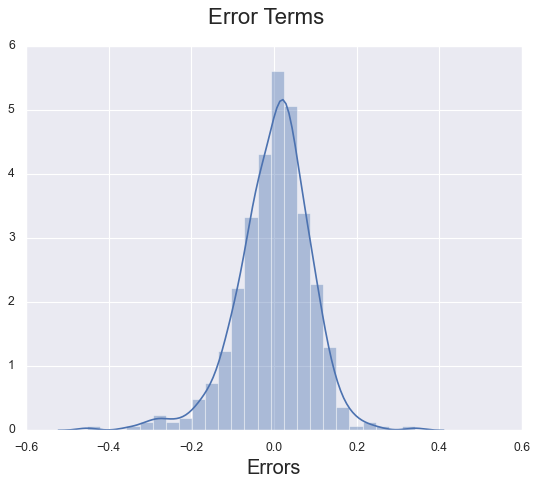

In [58]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [59]:
X_train_new = X_train_rfe_18.drop(['const'], axis=1)
X_train_new.columns

Index(['season_spring', 'season_summer', 'season_winter', 'month_Dec',
       'month_Jan', 'month_July', 'month_Nov', 'month_Sep',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy', 'Year', 'holiday',
       'temp', 'windspeed', 'weekday_Tue'],
      dtype='object')

In [60]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_Mar,month_May,month_Nov,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,workingday,temp,atemp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029


In [61]:
y_test = bike_test.pop('count')
X_test = bike_test

In [62]:
X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,season_spring,season_summer,season_winter,month_Dec,month_Jan,month_July,month_Nov,month_Sep,weathersit_Light Snow,weathersit_Mist + Cloudy,Year,holiday,temp,windspeed,weekday_Tue
184,0,0,0,0,0,1,0,0,0,1,0,1,0.831783,0.084219,0
535,0,1,0,0,0,0,0,0,0,0,1,0,0.901354,0.153728,0
299,0,0,1,0,0,0,0,0,0,1,0,0,0.511964,0.334206,0
221,0,0,0,0,0,0,0,0,0,0,0,0,0.881625,0.339570,0
152,0,1,0,0,0,0,0,0,0,0,0,0,0.817246,0.537414,0


Text(0, 0.5, 'y_test_pred')

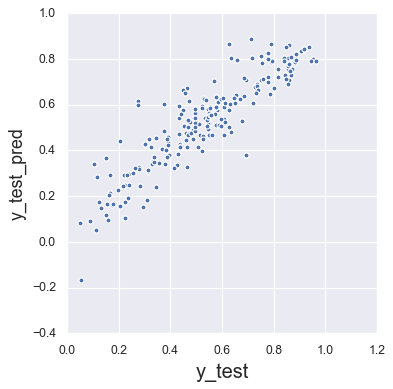

In [63]:
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr_model_18.predict(X_test_new)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

In [64]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8159581616160739

**R Sqaured comparison between Train and Test models:**

* Train r_squared = 0.84098
* Test r_squared  = 0.81596

*As we can observe there is not much difference between the r_squared of Train and Test models, hence it seems to be a good model that can very well generalize the various datasets.*

In [65]:
print(lr_model_18.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):          3.90e-186
Time:                        21:23:08   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     494   BIC:                            -915.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [66]:
lr_model_18.params

const                       0.246420
season_spring              -0.069633
season_summer               0.036311
season_winter               0.089939
month_Dec                  -0.044002
month_Jan                  -0.050523
month_July                 -0.047109
month_Nov                  -0.040220
month_Sep                   0.069586
weathersit_Light Snow      -0.294872
weathersit_Mist + Cloudy   -0.080296
Year                        0.234912
holiday                    -0.089792
temp                        0.439199
windspeed                  -0.156101
weekday_Tue                -0.026904
dtype: float64

### *Equation for the Best fitted line:*

<span style="color:green"> ***count = 0.2464 - (0.0696 * season_spring) + (0.0363 * season_summer) + (0.0899 * season_winter) - (0.044 * month_Dec) - (0.0505 * month_Jan) - (0.0471 * month_July) - (0.0402 * month_Nov) + (0.0696 * month_Sep) - (0.2948 * weathersit_Light Snow) - (0.0803 * weathersit_Mist + Cloudy) + (0.2349 * Year) - (0.0898 * holiday) + (0.4392 * temp) - (0.1561 * windspeed) - (0.0269 * weekday_Tue)*** </span>

### *As per our final Model, the below predictor variables greatly influences The Bike Rental count:*

* Temperature (positive)
* Year (positive)
* weathersit_Light Snow (negative)
* windspeed (negative)
* season_winter (negative)